In [10]:
import sys
sys.path.append("..")

In [11]:
import default_config as cfg
import local_storage_config as storage_cfg

cfg.__dict__.update(storage_cfg.__dict__)

In [12]:
import dataset_functions
import models.six_stage_linear_model as model
import dataset_builder
import utils
import tensorflow as tf
import visualizations as v
import matplotlib.pyplot as plt

In [13]:
model_ds=model.ModelDatasetComponent(cfg)

tfrecord_files_train=dataset_builder.get_tfrecord_filenames(cfg.TRAIN_TFRECORDS,cfg)
tfrecord_files_valid=dataset_builder.get_tfrecord_filenames(cfg.VALID_TFRECORDS,cfg)
print("Found the following training TFrecords:\n","\n".join(tfrecord_files_train))
print("Found the following validation TFrecords:\n","\n".join(tfrecord_files_valid))

print("Building training dataset")

# def build_training_ds(tfrecord_filenames: list, labels_placement_function, config) -> tf.data.Dataset:
#     """    :param config: effective config dict
#     :param labels_placement_function: a model function, which applies the last stage of transformation to the dataset, to distribute the
#     various labels correctly according to model outputs
#     :param tfrecord_filenames: should be list of correct TFrecord filename, either local or remote (gcs, with gs:// prefix)"""
#     # TFrecord files to raw format
#     dataset_transformer = dataset_functions.DatasetTransformer(config)
#     ds = tf.data.TFRecordDataset(tfrecord_filenames)  # numf reads can be put here, but I don't think I/O is the bottleneck
# 
#     # raw format to imgs,tensors(coords kpts)
#     ds = ds.map(dataset_transformer.read_tfrecord)
# 
#     # cache  ,caching is here before decompressing jpgs and label tensors (should be ~9GB) , (full dataset should be ~90, cache later if RAM aviable)
#     if config.CACHE: ds = ds.cache()
#     #if config.SHUFFLE: ds = ds.shuffle(100)
# 
#     # Augmentation should be here, to operate on smaller tensors
# 
#     ds = ds.map(dataset_transformer.open_image) #jpeg to array
#     ds = ds.map(dataset_transformer.make_label_tensors) # tensors to label_tensors (46,46,17/38)
# 
#     ds = ds.batch(config.BATCH_SIZE)
# 
#     #only image augmentation
#     ds = ds.map(image_only_augmentation)
#     ds = ds.map(mirror_augmentation)
#     
#     ds = ds.map(dataset_transformer.apply_mask)
#     #ds = ds.map(labels_placement_function) # imgs,label_tensors arrange for model outputs
#     
#     ds = ds.repeat()
#     if config.PREFETCH: ds = ds.prefetch(config.PREFETCH)
#     return ds

dst=dataset_builder.build_training_ds(tfrecord_files_train,lambda x:x,cfg)

Retrieving TFrecords from: C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords/training
Retrieving TFrecords from: C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords/validation
Found the following training TFrecords:
 C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-001.tfrecords
C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\training-002.tfrecords
Found the following validation TFrecords:
 C:\Users\flash\Project\Yet-Another-Openpose-Implmentation/dataset/TFrecords\validation-001.tfrecords
Building training dataset


In [14]:
it=iter(dst.skip(12))

In [15]:
st=next(it)

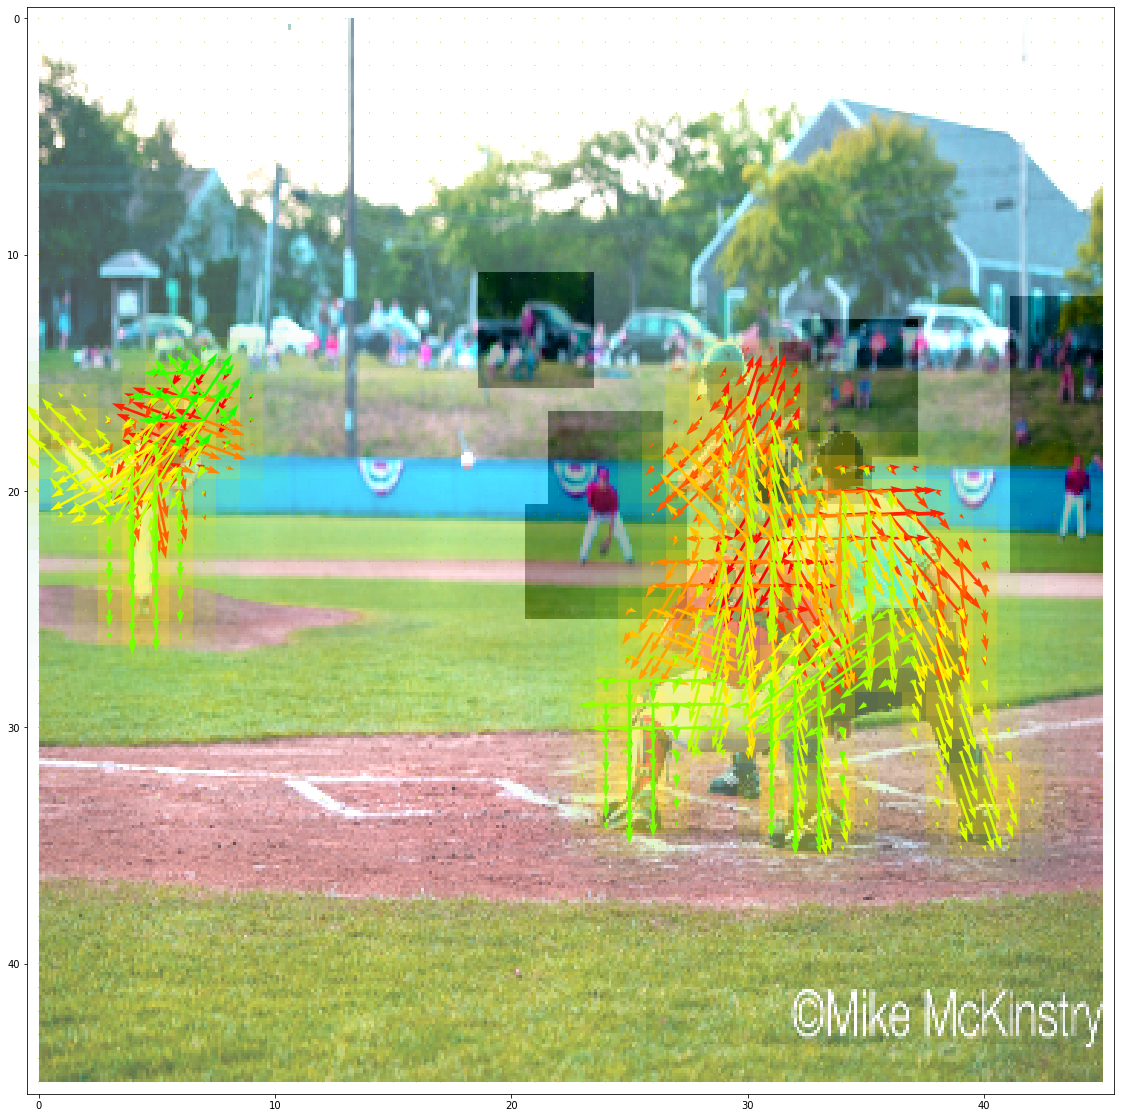

In [16]:

img=st["image"][1].numpy()
mask=st["pafs"][1][...,-1].numpy()
pafs=st["pafs"][1][...,:-1].numpy()
kpts=st["kpts"][1][...,:-1].numpy()

v.show_img_pafs_kpts(img,pafs,kpts,mask,figure_size=20)
plt.show()